In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import warnings
warnings.filterwarnings(action = 'ignore')

In [3]:
data = pd.read_csv('Raw_Housing_Prices.csv')
data

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,NaN,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,NaN,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,NaN,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,NaN,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [4]:
data.dtypes

ID                                             int64
Date House was Sold                           object
Sale Price                                   float64
No of Bedrooms                                 int64
No of Bathrooms                              float64
Flat Area (in Sqft)                          float64
Lot Area (in Sqft)                           float64
No of Floors                                 float64
Waterfront View                               object
No of Times Visited                           object
Condition of the House                        object
Overall Grade                                  int64
Area of the House from Basement (in Sqft)    float64
Basement Area (in Sqft)                        int64
Age of House (in Years)                        int64
Renovated Year                                 int64
Zipcode                                      float64
Latitude                                     float64
Longitude                                    f

In [5]:
data.isnull().sum()

ID                                               0
Date House was Sold                              0
Sale Price                                       4
No of Bedrooms                                   0
No of Bathrooms                                  4
Flat Area (in Sqft)                              9
Lot Area (in Sqft)                               9
No of Floors                                     0
Waterfront View                                  0
No of Times Visited                          19489
Condition of the House                           0
Overall Grade                                    0
Area of the House from Basement (in Sqft)        3
Basement Area (in Sqft)                          0
Age of House (in Years)                          0
Renovated Year                                   0
Zipcode                                          1
Latitude                                         1
Longitude                                        1
Living Area after Renovation (i

In [6]:
data.shape

(21613, 21)

In [7]:
data['Sale Price'].mean()

540198.4357443658

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

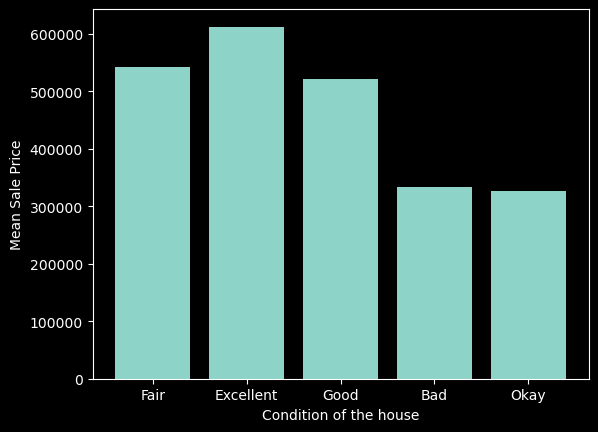

In [9]:
data['condition_sale']=0
for i in data['Condition of the House'].unique():
    data['condition_sale'][data['Condition of the House']==str(i)] = data['Sale Price'][data['Condition of the House']==str(i)].mean()
    data['condition_sale'].unique()
plt.figure(dpi=100)
plt.bar(data['Condition of the House'].unique(),data['condition_sale'].unique())   #since ['condition_sale'] col consists of the mean sale price of the each unique condition of the house
plt.xlabel('Condition of the house')
plt.ylabel('Mean Sale Price')
plt.show()

In [10]:
zip_condition_sale=pd.pivot_table(data, index=['Zipcode'], columns=['Condition of the House'], values=['Sale Price'], aggfunc=np.mean)
zip_condition_sale

Sale Price                                            \
Condition of the House        Bad     Excellent          Fair          Good   
Zipcode                                                                       
98001.0                       NaN  2.425433e+05  2.927207e+05  2.527446e+05   
98002.0                       NaN  2.216411e+05  2.588868e+05  2.192858e+05   
98003.0                       NaN  3.706800e+05  2.992801e+05  2.809591e+05   
98004.0                 1500000.0  1.236365e+06  1.527265e+06  1.145915e+06   
98005.0                       NaN  8.319500e+05  8.668012e+05  7.669397e+05   
...                           ...           ...           ...           ...   
98177.0                       NaN  8.966313e+05  6.496812e+05  6.665755e+05   
98178.0                       NaN  2.975217e+05  3.094105e+05  3.308419e+05   
98188.0                       NaN  2.853636e+05  2.900059e+05  2.867413e+05   
98198.0                       NaN  3.215235e+05  2.941619e+05  3.154305e+05   
98199.0                       NaN  9.338983e+05  7.604974e+05  7.963811e+05   

                                  
Condition of the House      Okay  
Zipcode                           
98001.0                 356070.0  
98002.0                      NaN  
98003.0                 235500.0  
98004.0                 425000.0  
98005.0                 577750.0  
...                          ...  
98177.0                      NaN  
98178.0                 175000.0  
98188.0                      NaN  
98198.0                 270532.5  
98199.0                      NaN  

[70 rows x 5 columns]

In [11]:
data['Sale Price'].head(10)

0     221900.0
1     538000.0
2     180000.0
3     604000.0
4     510000.0
5    1230000.0
6     257500.0
7     291850.0
8     229500.0
9     323000.0
Name: Sale Price, dtype: float64

In [12]:
data['Sale Price'].tail(10)

21603     507250.0
21604     429000.0
21605     610685.0
21606    1010000.0
21607     475000.0
21608     360000.0
21609     400000.0
21610     402101.0
21611     400000.0
21612     325000.0
Name: Sale Price, dtype: float64

In [13]:
data['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

From the above info.: 
1. count of value for this variable: 21613-21609 = 4 missing values
2. the Sale Price has quite a bit of range from 75k to 7.7Mn
3. the mean value and median(50%) are not same which means our data is not normally distributed
4. the mean value is higher than median which means the data may contain few outliers of high values or could be skewed towards lower values 

# DATA PREPROCESSING 

# Handling OUTLIERS

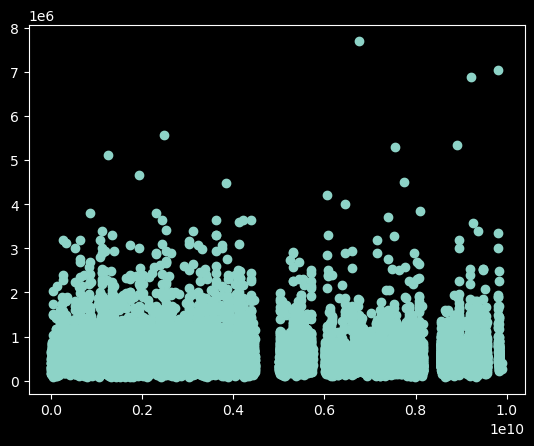

In [14]:
plt.scatter(x=data['ID'], y=data['Sale Price'])

In [15]:
import seaborn as sns

<Axes: xlabel='Sale Price'>

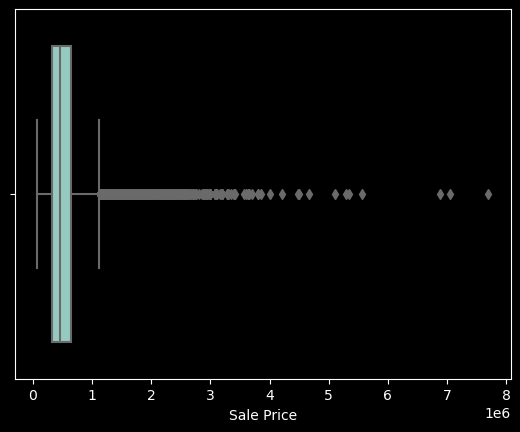

In [16]:
sns.boxplot(x=data['Sale Price'])

In [17]:
q1= data['Sale Price'].quantile(0.25)
q3= data['Sale Price'].quantile(0.75)

In [18]:
iqr= q3 - q1
iqr

323050.0

In [19]:
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
upper_limit, lower_limit

(1129575.0, -162625.0)

Any data point which is higher than the upper_limit and lower than the lower_limit is termed as an OUTLIER

In [20]:
def limit_imputer(value):
    if value > upper_limit:
        return upper_limit
    if value < lower_limit:
        return lower_limit
    else:
        return value

In [21]:
data['Sale Price']=data['Sale Price'].apply(limit_imputer)

In [22]:
data['Sale Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

# Treating Missing Values

In [23]:
data.dropna(subset=['Sale Price'], axis=0, inplace =True)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House     

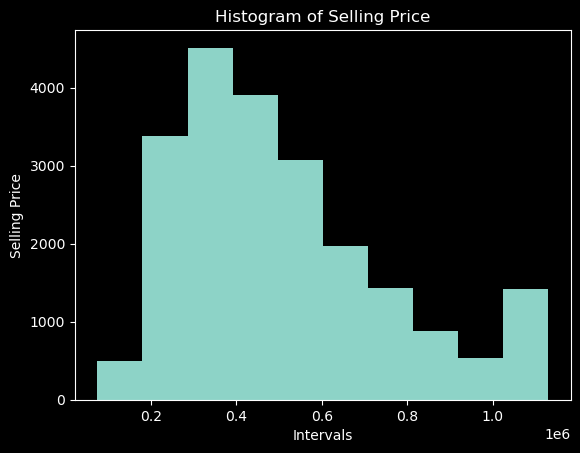

In [25]:
plt.hist(data['Sale Price'], bins=10)
plt.xlabel('Intervals')
plt.ylabel('Selling Price')
plt.title('Histogram of Selling Price')
plt.show()

# Independent Numerical Variables

In [26]:
data= pd.read_csv('Raw_Housing_Prices2.csv')
data

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,NaN,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21605,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,NaN,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21606,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,NaN,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21607,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,NaN,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [27]:
len(data['Latitude'].unique())

5034

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

point out the variables which have missing values in them

In [29]:
numerical_columns=['No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)','Area of the House from Basement (in Sqft)',
                  'Latitude','Longitude','Living Area after Renovation (in Sqft)']

In [30]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy='median')
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

In [32]:
imputer = SimpleImputer(missing_values = np.nan, strategy='most_frequent')  #most_frequent= mode
data['Zipcode'] = imputer.fit_transform(data['Zipcode'])

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [ ]:
data['Zipcode'].shape

In [33]:
column = data['Zipcode'].values.reshape(-1,1)
column.shape

(21609, 1)

In [34]:
column = data['Zipcode'].values.reshape(-1,1)
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
data['Zipcode'] = imputer.fit_transform(column)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

# Explore and Preprocess all the numerical variables in the data

In [36]:
data = pd.read_csv('Raw_Housing_Prices3.csv')

In [37]:
data

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,NaN,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21605,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,NaN,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21606,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,NaN,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21607,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,NaN,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


# Variable Transformation

In [38]:
data['No of Times Visited'].unique()

array([nan, 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [39]:
mapping = {'Once': '1', 'Twice':'2', 'Thrice':'3', 'Four':'4'}
data['No of Times Visited'] = data['No of Times Visited'].map(mapping)

In [40]:
data['No of Times Visited'].unique()

array([nan, '3', '4', '2', '1'], dtype=object)

In [41]:
data['Ever Renovated']= np.where(data['Renovated Year']==0 , 'No', 'Yes')

In [42]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,No
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,Yes
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,No
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,No
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503,No


In [43]:
data['Purchase Year']= pd.DatetimeIndex(data['Date House was Sold']).year

In [44]:
data['Years Since Renovation']= np.where(data['Ever Renovated']=='Yes', abs(data['Purchase Year']-data['Renovated Year']), 0)

In [45]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Purchase Year,Years Since Renovation
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,63,0,98178.0,47.5112,-122.257,1340.0,5650,No,2017,0
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,67,1991,98125.0,47.7210,-122.319,1690.0,7639,Yes,2017,26
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,85,0,98028.0,47.7379,-122.233,2720.0,8062,No,2016,0
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,53,0,98136.0,47.5208,-122.393,1360.0,5000,No,2017,0
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,31,0,98074.0,47.6168,-122.045,1800.0,7503,No,2016,0


1. we would be using 'YEARS SINCE RENOVATION' for our analysis and model building 
2. so, we can drop the other 3 variables, i.e DATE HOUSE WAS SOLD, RENOVATED YEAR & PURCHASE YEAR

In [46]:
data.drop(columns=['Date House was Sold', 'Renovated Year','Purchase Year'], inplace =True, axis=1)

In [47]:
data.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,Fair,...,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,Fair,...,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,Fair,...,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,Excellent,...,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,Fair,...,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


# Correlation

In [48]:
data= pd.read_csv('Transformed_Housing_Data.csv')

In [49]:
data.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


In [50]:
data['Sale Price'].corr(data['Flat Area (in Sqft)'])

0.6951704258420673

In [51]:
np.corrcoef(data['Sale Price'], data['Flat Area (in Sqft)'])

array([[1.        , 0.69517043],
       [0.69517043, 1.        ]])

In [52]:
numeric_data = data.drop(columns=['ID']).select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
(correlation_matrix)

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation
Sale Price,1.000000,0.339407,0.535124,0.695170,0.101319,0.298913,0.356114,0.680914,0.606527,0.307513,-0.064306,-0.043047,0.402430,0.045401,0.629944,0.092325,0.065907
No of Bedrooms,0.339407,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.349223,0.477549,0.303294,-0.154113,-0.152760,-0.008708,0.129569,0.391771,0.029264,-0.007198
No of Bathrooms,0.535124,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,0.635638,0.685088,0.283798,-0.505954,-0.203951,0.024570,0.223171,0.568568,0.087226,0.003551
Flat Area (in Sqft),0.695170,0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.705725,0.876226,0.435142,-0.318146,-0.199380,0.052538,0.240091,0.756185,0.183223,0.023503
Lot Area (in Sqft),0.101319,0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,0.102314,0.183492,0.015252,-0.053119,-0.129551,-0.085719,0.229449,0.144507,0.718527,0.013835
No of Floors,0.298913,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,0.461368,0.524031,-0.245572,-0.489244,-0.059222,0.049692,0.125620,0.280106,-0.011204,-0.000901
No of Times Visited,0.356114,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.223661,0.167812,0.276974,0.053395,0.084830,0.006162,-0.078453,0.280452,0.072561,0.093546
Overall Grade,0.680914,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,1.000000,0.705153,0.145232,-0.456711,-0.185844,0.111226,0.201736,0.681362,0.107581,-0.024388
Area of the House from Basement (in Sqft),0.606527,0.477549,0.685088,0.876226,0.183492,0.524031,0.167812,0.705153,1.000000,-0.051825,-0.423848,-0.261124,-0.000819,0.343793,0.731996,0.194106,0.010491
Basement Area (in Sqft),0.307513,0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.145232,-0.051825,1.000000,0.133072,0.074933,0.110451,-0.144822,0.200302,0.017263,0.029158


1. Only those variables should be selected for building the model which have high correlation, +ve or -ve , with the target variable.
2. Strong correlation => correlation score is more than approx. 0.55

# Categorical Variables

In [53]:
data.drop(columns = ['ID'], inplace = True)

In [54]:
data

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,360000.0,3,2.50,1530.0,1131.0,3.0,No,0,Fair,8,1530.0,0,9,98103.0,47.6993,-122.346,1530.0,1509,No,0
21605,400000.0,4,2.50,2310.0,5813.0,2.0,No,0,Fair,8,2310.0,0,4,98146.0,47.5107,-122.362,1830.0,7200,No,0
21606,402101.0,2,0.75,1020.0,1350.0,2.0,No,0,Fair,7,1020.0,0,9,98144.0,47.5944,-122.299,1020.0,2007,No,0
21607,400000.0,3,2.50,1600.0,2388.0,2.0,No,0,Fair,8,1600.0,0,14,98027.0,47.5345,-122.069,1410.0,1287,No,0


In [55]:
data['Condition of the House'].head(10)

0         Fair
1         Fair
2         Fair
3    Excellent
4         Fair
5         Fair
6         Fair
7         Fair
8         Fair
9         Fair
Name: Condition of the House, dtype: object

In [56]:
data['Condition of the House'].value_counts()

Condition of the House
Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: count, dtype: int64

<Axes: xlabel='Condition of the House'>

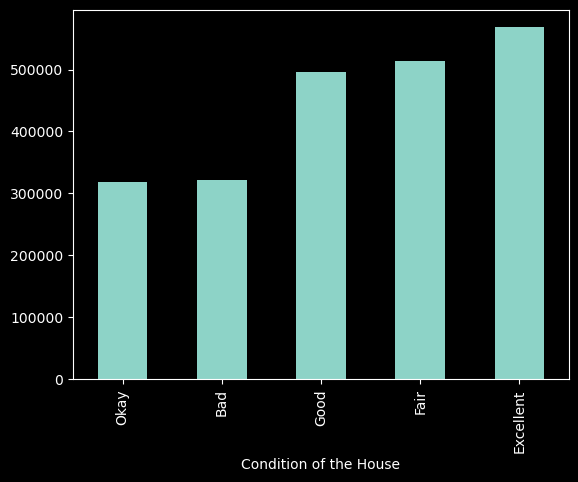

In [57]:
data.groupby('Condition of the House')['Sale Price'].mean().sort_values().plot(kind='bar')

<Axes: xlabel='Zipcode'>

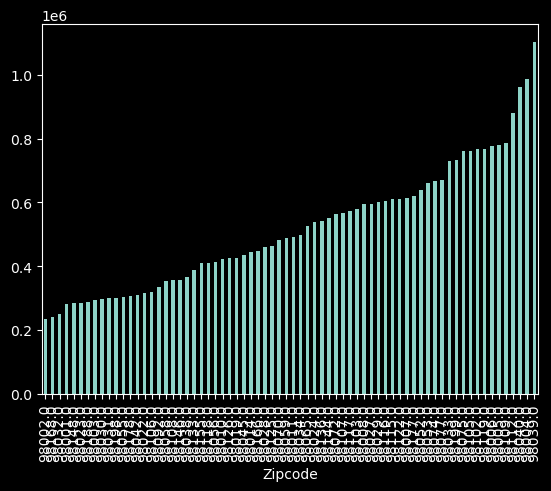

In [58]:
data.groupby('Zipcode')['Sale Price'].mean().sort_values().plot(kind='bar')

# Relation b/w Categorical and Numerical Variable using ANOVA

In [59]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [60]:
data= data.rename(columns = {'Sale Price': 'Sale_Price'})
data= data.rename(columns = {'Condition of the House': 'Condition_of_the_House'})
data= data.rename(columns = {'Waterfront View': 'Waterfront_View'})
data= data.rename(columns = {'Ever Renovated': 'Ever_Renovated'})
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_View,No of Times Visited,Condition_of_the_House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_Renovated,Years Since Renovation
0,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


In [61]:
mod = ols('Sale_Price ~ Condition_of_the_House', data = data).fit()

In [62]:
Anova_Table = sm.stats.anova_lm(mod, typ=2)
Anova_Table

,sum_sq,df,F,PR(>F)
Condition_of_the_House,1.441831e+13,4.0,58.25563,5.447605e-49
Residual,1.336752e+15,21604.0,NaN,NaN


In [63]:
mod = ols('Sale_Price ~ Waterfront_View', data = data).fit()
Anova_Table = sm.stats.anova_lm(mod, typ=2)
Anova_Table

,sum_sq,df,F,PR(>F)
Waterfront_View,3.283737e+13,1.0,538.192683,1.275558e-117
Residual,1.318333e+15,21607.0,NaN,NaN


In [64]:
mod = ols('Sale_Price ~ Ever_Renovated', data = data).fit()
Anova_Table = sm.stats.anova_lm(mod, typ=2)
Anova_Table

,sum_sq,df,F,PR(>F)
Ever_Renovated,1.998463e+13,1.0,324.378469,5.419055e-72
Residual,1.331185e+15,21607.0,NaN,NaN


In [65]:
mod = ols('Sale_Price ~ Zipcode', data = data).fit()
Anova_Table = sm.stats.anova_lm(mod, typ=2)
Anova_Table

,sum_sq,df,F,PR(>F)
Zipcode,2.503765e+12,1.0,40.112844,2.444308e-10
Residual,1.348666e+15,21607.0,NaN,NaN


# Creating Dummy Variables

In [66]:
data = pd.get_dummies(data, columns = ['Condition_of_the_House', 'Waterfront_View', 'Ever_Renovated'], drop_first = True)

In [67]:
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Waterfront_View_Yes,Ever_Renovated_Yes
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,-122.257,1340.0,5650,0,False,True,False,False,False,False
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,-122.319,1690.0,7639,26,False,True,False,False,False,True
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,-122.233,2720.0,8062,0,False,True,False,False,False,False
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,-122.393,1360.0,5000,0,True,False,False,False,False,False
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,-122.045,1800.0,7503,0,False,True,False,False,False,False


In [68]:
Zip_Table = data.groupby('Zipcode').agg({"Sale_Price": 'mean'}).sort_values('Sale_Price', ascending = True)

In [69]:
Zip_Table.head()

,Sale_Price
Zipcode,
98002.0,234284.035176
98168.0,240328.371747
98032.0,251296.240000
98001.0,280804.690608
98148.0,284908.596491


In [70]:
Zip_Table['Zipcode_Group']= pd.cut(Zip_Table["Sale_Price"], bins= 10, 
                             labels = ['Zipcode_Group_0',
                                       'Zipcode_Group_1',
                                       'Zipcode_Group_2',
                                       'Zipcode_Group_3',
                                       'Zipcode_Group_4',
                                       'Zipcode_Group_5',
                                       'Zipcode_Group_6',
                                       'Zipcode_Group_7',
                                       'Zipcode_Group_8',
                                       'Zipcode_Group_9'],
                            include_lowest=True)

In [71]:
Zip_Table = Zip_Table.drop(columns = 'Sale_Price')

In [72]:
data = pd.merge(data, Zip_Table, left_on = 'Zipcode', how='left', right_index= True)

In [73]:
data = data.drop(columns = 'Zipcode')

In [74]:
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Waterfront_View_Yes,Ever_Renovated_Yes,Zipcode_Group
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,1340.0,5650,0,False,True,False,False,False,False,Zipcode_Group_0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,1690.0,7639,26,False,True,False,False,False,True,Zipcode_Group_2
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,2720.0,8062,0,False,True,False,False,False,False,Zipcode_Group_2
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,1360.0,5000,0,True,False,False,False,False,False,Zipcode_Group_3
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,1800.0,7503,0,False,True,False,False,False,False,Zipcode_Group_4


In [75]:
data =pd.get_dummies(data, columns = ['Zipcode_Group'], drop_first=True)

In [76]:
data

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Ever_Renovated_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,False,False,False,False,False,False,False,False,False,False
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,True,False,True,False,False,False,False,False,False,False
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,False,False,True,False,False,False,False,False,False,False
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,False,False,False,True,False,False,False,False,False,False
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,360000.0,3,2.50,1530.0,1131.0,3.0,0,8,1530.0,0,...,False,False,False,True,False,False,False,False,False,False
21605,400000.0,4,2.50,2310.0,5813.0,2.0,0,8,2310.0,0,...,False,True,False,False,False,False,False,False,False,False
21606,402101.0,2,0.75,1020.0,1350.0,2.0,0,7,1020.0,0,...,False,False,False,True,False,False,False,False,False,False
21607,400000.0,3,2.50,1600.0,2388.0,2.0,0,8,1600.0,0,...,False,False,False,False,True,False,False,False,False,False


# Splitting of Data

In [77]:
data = pd.read_csv('Transformed_Housing_Data2.csv')
data

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,360000.0,3,2.50,1530.0,1131.0,3.0,0,8,1530.0,0,...,0,0,0,1,0,0,0,0,0,0
21605,400000.0,4,2.50,2310.0,5813.0,2.0,0,8,2310.0,0,...,0,1,0,0,0,0,0,0,0,0
21606,402101.0,2,0.75,1020.0,1350.0,2.0,0,7,1020.0,0,...,0,0,0,1,0,0,0,0,0,0
21607,400000.0,3,2.50,1600.0,2388.0,2.0,0,8,1600.0,0,...,0,0,0,0,1,0,0,0,0,0


In [78]:
Y = data.iloc[:,0]           #independent var

In [79]:
X = data.iloc[:,1:31]      #dependent var

In [80]:
X.head(5)

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,63,...,0,0,0,0,0,0,0,0,0,0
1,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,67,...,0,0,1,0,0,0,0,0,0,0
2,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,85,...,0,0,1,0,0,0,0,0,0,0
3,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,53,...,0,0,0,1,0,0,0,0,0,0
4,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,31,...,0,0,0,0,1,0,0,0,0,0


In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [83]:
X_train.shape

(15126, 30)

In [84]:
X_test.shape

(6483, 30)

In [85]:
Y_train.shape

(15126,)

In [86]:
Y_test.shape

(6483,)

# Feature Scaling

STANDARDISATION

In [87]:
from sklearn import preprocessing
scale = preprocessing.StandardScaler()

In [88]:
X_train = scale.fit_transform(X_train)

In [89]:
X_train

array([[ 0.6662381 ,  0.49747045, -0.40840748, ..., -0.11248619,
        -0.16544527, -0.04815873],
       [ 0.6662381 ,  1.46773667,  3.68851083, ..., -0.11248619,
        -0.16544527, -0.04815873],
       [ 0.6662381 ,  1.46773667,  2.37749697, ..., -0.11248619,
         6.04429473, -0.04815873],
       ...,
       [-0.39667905, -0.47279578, -0.04787867, ..., -0.11248619,
        -0.16544527, -0.04815873],
       [-1.45959621, -1.443062  , -0.57228422, ..., -0.11248619,
        -0.16544527, -0.04815873],
       [ 0.6662381 ,  1.14431459, -0.0981342 , ..., -0.11248619,
        -0.16544527, -0.04815873]])

In [90]:
X_test = scale.fit_transform(X_test)
X_test

array([[-0.40392801, -1.45816067, -1.10683643, ..., -0.1117772 ,
        -0.17656569, -0.04815713],
       [-0.40392801,  0.17956076, -0.59880785, ..., -0.1117772 ,
        -0.17656569, -0.04815713],
       [-0.40392801, -0.14798353, -0.24210692, ..., -0.1117772 ,
        -0.17656569, -0.04815713],
       ...,
       [-0.40392801, -0.14798353, -0.30696164, ..., -0.1117772 ,
        -0.17656569, -0.04815713],
       [ 0.70239446,  0.50710504,  0.83880497, ..., -0.1117772 ,
        -0.17656569, -0.04815713],
       [-0.40392801,  0.17956076,  0.5145314 , ..., -0.1117772 ,
        -0.17656569, -0.04815713]])

# Mean Regression model

In [91]:
data['mean_sales']= data['Sale_Price'].mean()
data['mean_sales'].head()

0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: mean_sales, dtype: float64

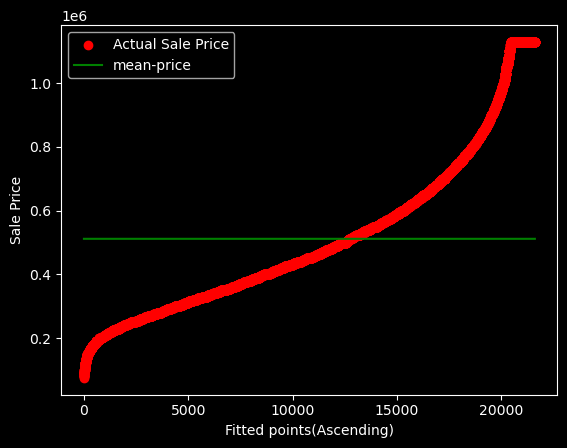

In [92]:
plt.figure(dpi=100)
k= range(0, len(data))
plt.scatter(k, data['Sale_Price'].sort_values(), color='red', label='Actual Sale Price')
plt.plot(k, data['mean_sales'].sort_values(), color='green', label='mean-price')
plt.xlabel('Fitted points(Ascending)')
plt.ylabel('Sale Price')
plt.legend()

Imporoving the mean regression model

In [93]:
grades_mean = data.pivot_table(values= 'Sale_Price', columns='Overall Grade', aggfunc= np.mean)
grades_mean

Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale_Price,142000.0,1129575.0,205666.666667,214381.034483,248523.971074,301882.01472,402239.619779,537584.082097,736936.769025,960408.078866


In [94]:
#making new column
data['grade_mean']=0
# for every grade fill its mean price in new column
for i in grades_mean.columns:
    data['grade_mean'][data['Overall Grade'] == i] = grades_mean[i][0]
data['grade_mean'].head()

0    402239.619779
1    402239.619779
2    301882.014720
3    402239.619779
4    537584.082097
Name: grade_mean, dtype: float64

In [95]:
gradewise_list=[]
for i in range(1,11):
    k = data['Sale_Price'][data['Overall Grade']==i]
    gradewise_list.append(k)

In [96]:
classwise_list = []
for i in range(1,11):
    k = data['Sale_Price'][data['Overall Grade'] == i]
    classwise_list.append(k)

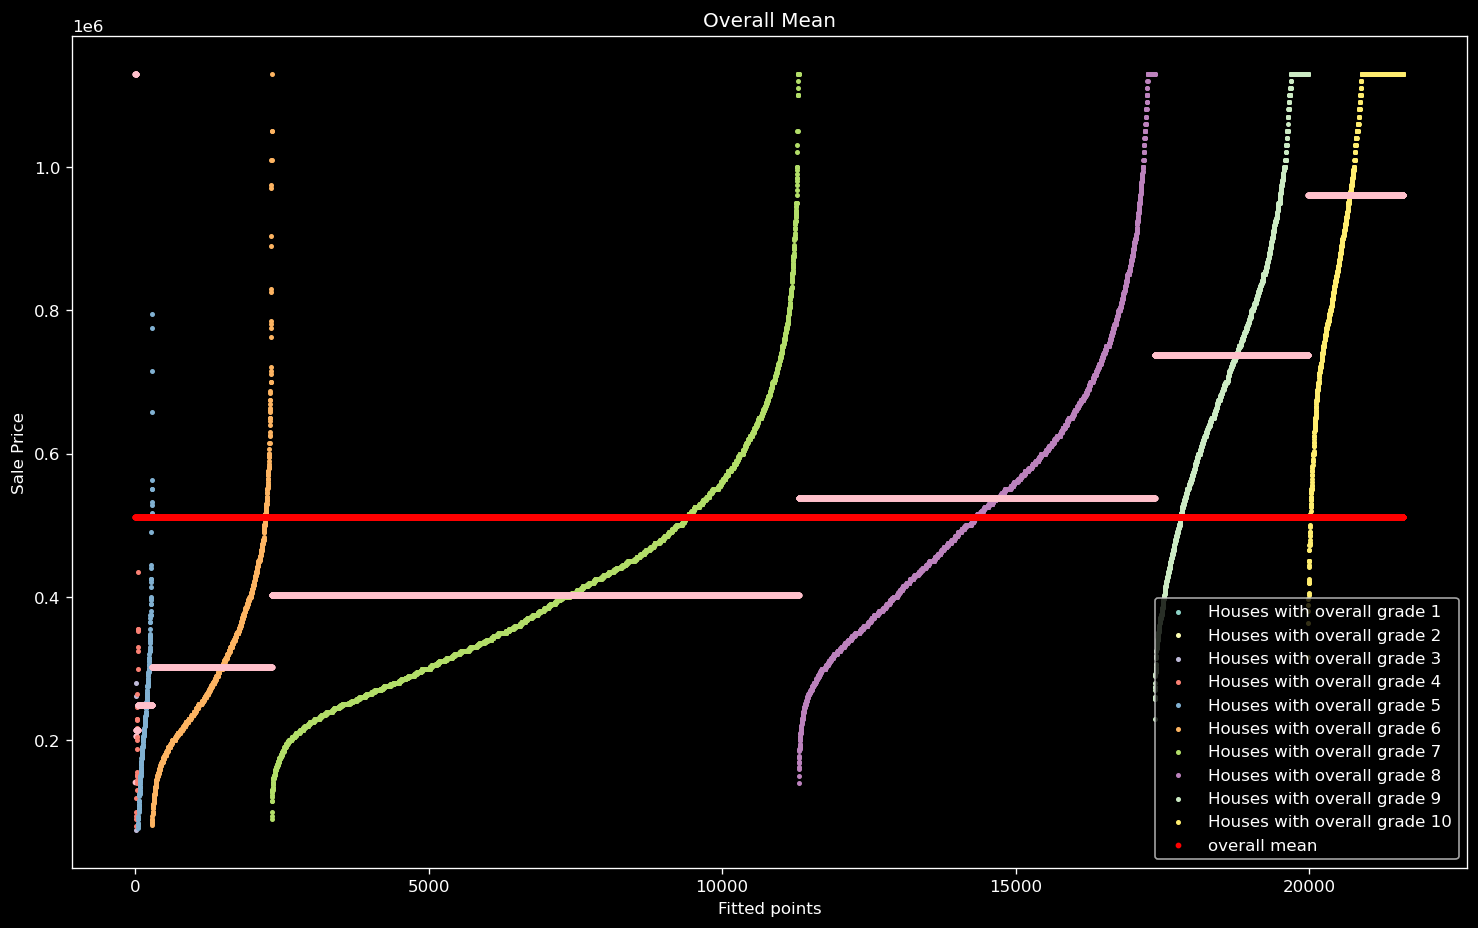

In [97]:
plt.figure(dpi=120, figsize=(15, 9))

# Calculate mean sales once
overall_mean = data['mean_sales']

# z variable is for x-axis
z = 0
for i in range(1, 11):
    # Defining x-axis using z
    points = [k for k in range(z, z + len(classwise_list[i-1]))]
    
    # Plotting
    plt.scatter(points, classwise_list[i-1].sort_values(), label=f'Houses with overall grade {i}', s=4)
    
    # Plotting gradewise mean
    plt.scatter(points, [classwise_list[i-1].mean() for q in range(len(classwise_list[i-1]))], s=6, color='pink')
    
    z = max(points) + 1

# Plotting overall mean (after the loop to avoid repetitive plotting)
plt.scatter([q for q in range(0, z)], overall_mean[:z], color='red', label='overall mean', s=6)

plt.xlabel('Fitted points')
plt.ylabel('Sale Price')
plt.title('Overall Mean')
plt.legend(loc=4)
plt.show()


Residual Plot - a more easier way to visualise models

In [98]:
# residuals = predictions - actuals
mean_difference = data['mean_sales'] - data['Sale_Price']
grade_mean_difference = data['grade_mean'] - data['Sale_Price']

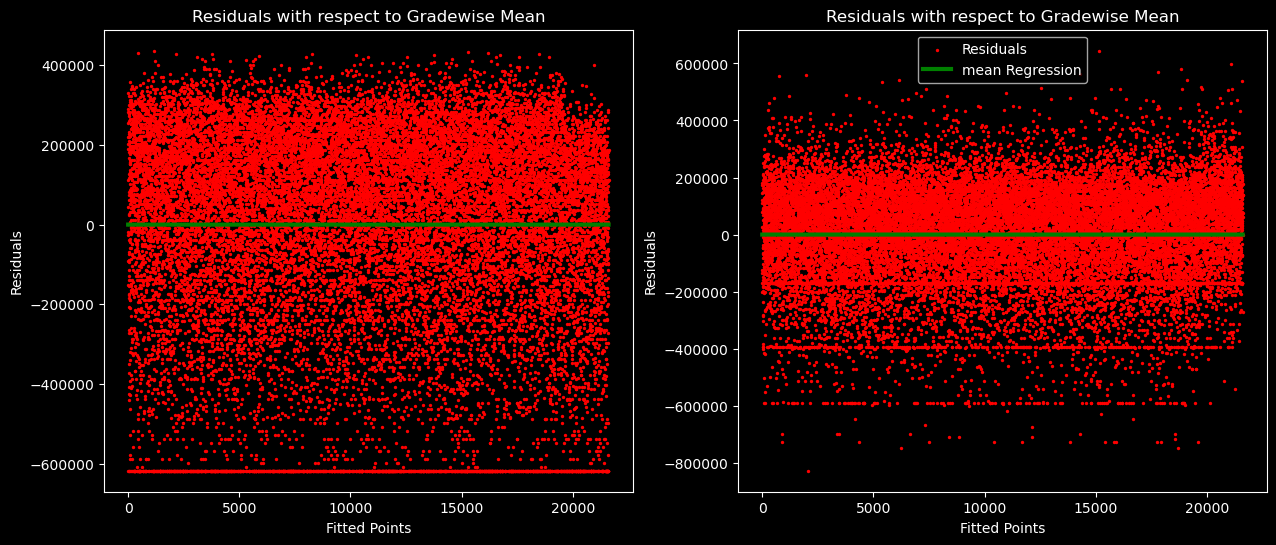

In [99]:
k = range(0, len(data))

## A list of zeroes which will represent the residual of a perfect model where predictions are exactly the same as actuals 
##  and hence the residuals would be zero
l = [0 for i in range(len(data))]

plt.figure(dpi=100, figsize=(15,6))
plt.subplot(1,2,1)
plt.scatter(k , mean_difference, color='red', label='Residuals', s=2)
plt.plot(k,l, color='green', label='mean Regression', linewidth = 3)
plt.xlabel('Fitted Points')
plt.ylabel('Residuals')
plt.title('Residuals with respect to Gradewise Mean')

plt.subplot(1,2,2)
plt.scatter(k, grade_mean_difference, color='red', label='Residuals', s=2)
plt.plot(k, l, color='green', label='mean Regression', linewidth = 3)
plt.xlabel('Fitted Points')
plt.ylabel('Residuals')
plt.title('Residuals with respect to Gradewise Mean')
plt.legend()

# The zero line(Green line) representing residuals of a perfect model which would be zeroes. 

# The 1st model has larger spread of residuals compared to the 2nd model which means 2nd model is closer to the zero line and hence the perfect model

# This verifies our assumption that mean regression based on a categorical feature will give better results

In [100]:
Y = data['Sale_Price']
Y_bar = data['mean_sales']
Y_hat = data['grade_mean']
n =  len(data)

len(Y), len(Y_bar), len(Y_hat), n

(21609, 21609, 21609, 21609)

In [101]:
from sklearn.metrics import mean_squared_error
mse_mean = mean_squared_error(Y_bar, Y)
mse_mean

62528116847.799576

In [102]:
mse_model = mean_squared_error(Y_hat, Y)
mse_model

30804835720.342426

In [103]:
R2 = 1- (mse_model/mse_mean)
R2

0.5073442592981836

The higher the R2 is, the more is the variation explained by the input variables and hence better is the model 

# LINEAR REGRESSION MODEL

In [104]:
data

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9,mean_sales,grade_mean
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,511618.558147,402239.619779
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,1,0,0,0,0,0,0,0,511618.558147,402239.619779
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,1,0,0,0,0,0,0,0,511618.558147,301882.014720
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,1,0,0,0,0,0,0,511618.558147,402239.619779
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,1,0,0,0,0,0,511618.558147,537584.082097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,360000.0,3,2.50,1530.0,1131.0,3.0,0,8,1530.0,0,...,0,1,0,0,0,0,0,0,511618.558147,537584.082097
21605,400000.0,4,2.50,2310.0,5813.0,2.0,0,8,2310.0,0,...,0,0,0,0,0,0,0,0,511618.558147,537584.082097
21606,402101.0,2,0.75,1020.0,1350.0,2.0,0,7,1020.0,0,...,0,1,0,0,0,0,0,0,511618.558147,402239.619779
21607,400000.0,3,2.50,1600.0,2388.0,2.0,0,8,1600.0,0,...,0,0,1,0,0,0,0,0,511618.558147,537584.082097


In [105]:
sale_price = data['Sale_Price'].head(30)
flat_area = data['Flat Area (in Sqft)'].head(30)
sample_data = pd.DataFrame({'sale_price': sale_price,'flat_area': flat_area})
sample_data

,sale_price,flat_area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0
5,1129575.0,5420.0
6,257500.0,1715.0
7,291850.0,1060.0
8,229500.0,1780.0
9,323000.0,1890.0


<function matplotlib.pyplot.show(close=None, block=None)>

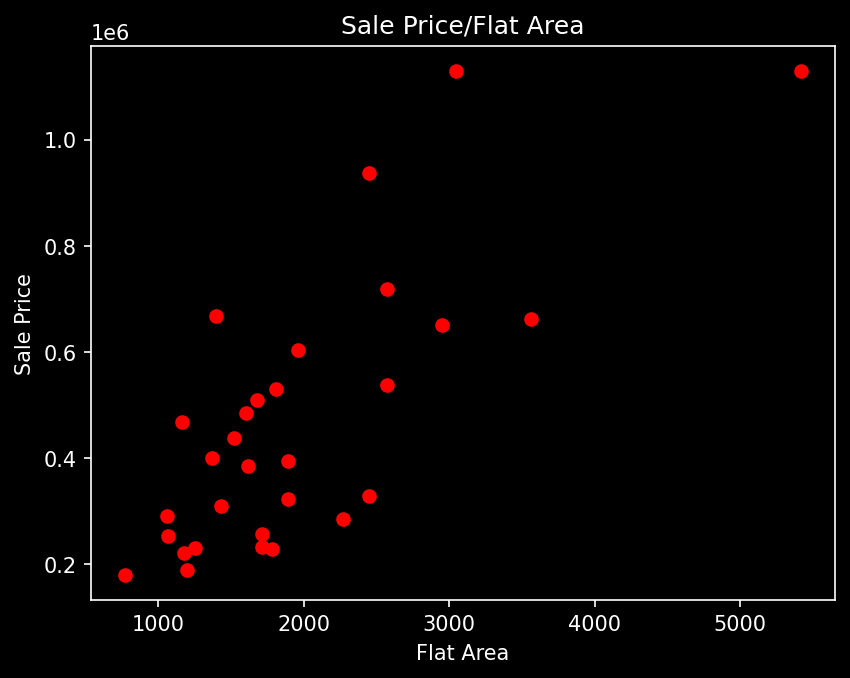

In [106]:
plt.figure(dpi=150)
plt.scatter(sample_data.flat_area, sample_data.sale_price, color='red')
plt.xlabel('Flat Area')
plt.ylabel('Sale Price')
plt.title("Sale Price/Flat Area")
plt.show


Build the mean regression model

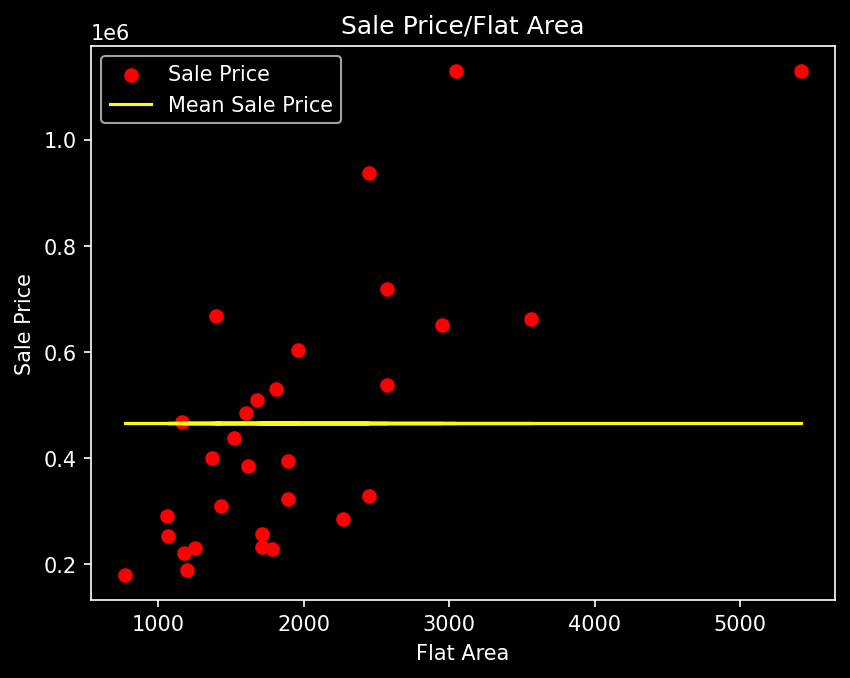

In [107]:
sample_data['mean_sale_price']= sample_data.sale_price.mean()

plt.figure(dpi=150)
plt.scatter(sample_data.flat_area, sample_data.sale_price, color='red', label='Sale Price')
plt.plot(sample_data.flat_area, sample_data.mean_sale_price, color='yellow', label='Mean Sale Price')
plt.xlabel('Flat Area')
plt.ylabel('Sale Price')
plt.title('Sale Price/Flat Area')
plt.legend()

# The mean regression model says that every new house listed would have the same price irrespective of the flat area which is not correct 

Text(0.5, 1.0, 'Slope 0 with MSE 281372081125.0')

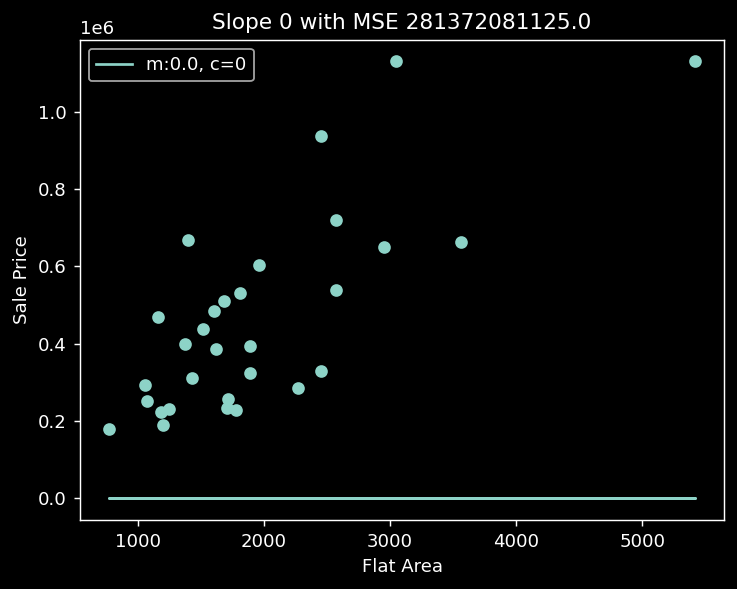

In [108]:
from sklearn.metrics import mean_squared_error as mse
c=0
m=0
line = []

for i in range(len(sample_data)):
    line.append(sample_data.flat_area[i] * m + c)             # y = x * m + c

plt.figure(dpi=130)
plt.scatter(sample_data.flat_area, sample_data.sale_price)
plt.plot(sample_data.flat_area, line, label= 'm:0.0, c=0')
plt.xlabel('Flat Area')
plt.ylabel('Sale Price')
plt.title('Sale Price/Flat Area')
plt.legend()

## calculating the mean squared error with respect to the line we have plotted
MSE = mse(sample_data.sale_price, line)                       # mse(actual_vale, predicted_value)
plt.title("Slope " +str(m)+ " with MSE " + str(MSE))

Text(0.5, 1.0, 'Slope 50 with MSE 184728400708.33334')

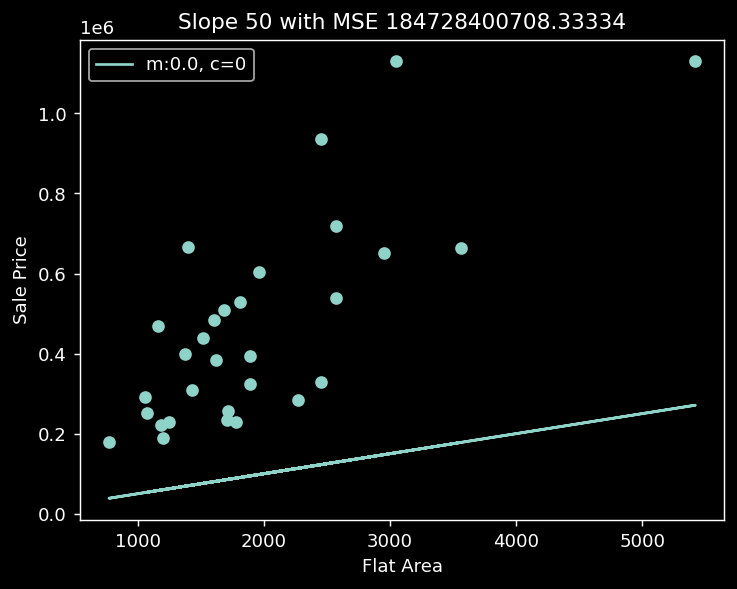

In [109]:
from sklearn.metrics import mean_squared_error as mse
c=0
m=50
line = []

for i in range(len(sample_data)):
    line.append(sample_data.flat_area[i] * m + c)             # y = x * m + c

plt.figure(dpi=130)
plt.scatter(sample_data.flat_area, sample_data.sale_price)
plt.plot(sample_data.flat_area, line, label= 'm:0.0, c=0')
plt.xlabel('Flat Area')
plt.ylabel('Sale Price')
plt.title('Sale Price/Flat Area')
plt.legend()

## calculating the mean squared error with respect to the line we have plotted
MSE = mse(sample_data.sale_price, line)                       # mse(actual_vale, predicted_value)
plt.title("Slope " +str(m)+ " with MSE " + str(MSE))

In [110]:
def slope_error(slope, intercept, sample_data):
    sale =[]
    for i in range(len(sample_data.flat_area)):
        tmp = sample_data.flat_area[i] * slope + intercept
        sale.append(tmp)
    MSE = mse(sample_data.sale_price, sale)
    return MSE

In [111]:
slope = [i/10 for i in range(0,5000)]
Cost = []
for i in slope:
    cost = slope_error(slope = i, intercept = 0, sample_data=sample_data)
    Cost.append(cost)       

 cost of a  model is nothing but the error MSE of the model

In [112]:
## arranging in dataframe
Cost_table = pd.DataFrame({'slope':slope, 'Cost': Cost})
Cost_table.tail()

,slope,Cost
4995,499.5,3.526038e+11
4996,499.6,3.528488e+11
4997,499.7,3.530938e+11
4998,499.8,3.533389e+11
4999,499.9,3.535842e+11


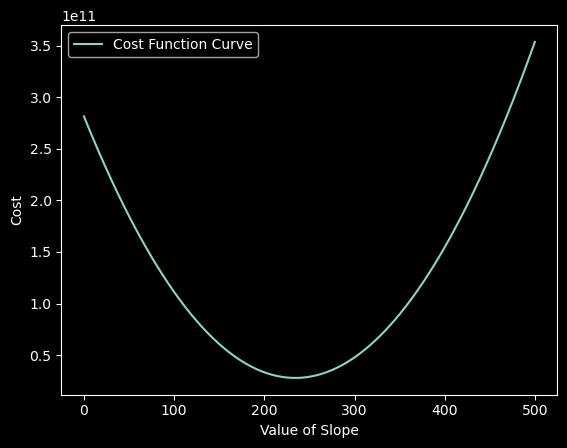

In [113]:
# plotting the cost values corresponding to every value of beta
plt.plot(Cost_table.slope, Cost_table.Cost, label= 'Cost Function Curve')
plt.xlabel('Value of Slope')
plt.ylabel('Cost')
plt.legend()

The cost incuured when the slope is 0 is very high but as we increase the slope the cost reduces

In [114]:
new_slope = Cost_table['slope'][Cost_table['Cost'] == Cost_table['Cost'].min()].values[0]
new_slope

234.3

In [115]:
def intercept_error(slope, intercept, sample_data):
    sale =[]
    for i in range(len(sample_data.flat_area)):
        tmp = sample_data.flat_area[i] * slope + intercept
        sale.append(tmp)
    MSE = mse(sample_data.sale_price, sale)
    return MSE

In [116]:
intercept = [i for i in range(5000,50000)]
Cost = []
for i in intercept:
    cost = intercept_error(slope = 234, intercept = i, sample_data=sample_data)
    Cost.append(cost) 

In [117]:
## arranging in dataframe
Cost_table = pd.DataFrame({'intercept':intercept, 'Cost': Cost})
Cost_table.tail()

,intercept,Cost
44995,49995,2.929862e+10
44996,49996,2.929870e+10
44997,49997,2.929878e+10
44998,49998,2.929886e+10
44999,49999,2.929894e+10


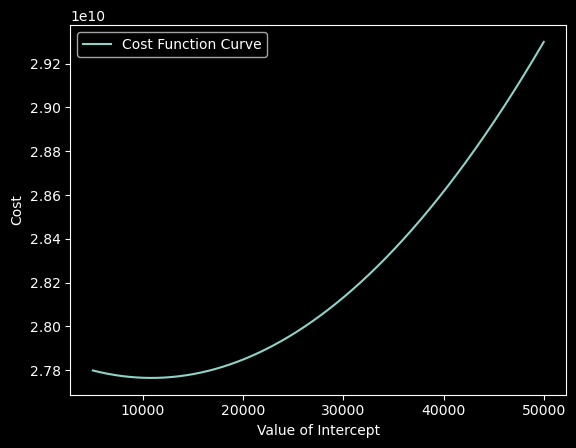

In [118]:
# plotting the cost values corresponding to every value of beta
plt.plot(Cost_table.intercept, Cost_table.Cost, label= 'Cost Function Curve')
plt.xlabel('Value of Intercept')
plt.ylabel('Cost')
plt.legend()

In [119]:
new_intercept = Cost_table['intercept'][Cost_table['Cost'] == Cost_table['Cost'].min()].values[0]
new_intercept

10834

In [120]:
slope = [i/10 for i in range(0,5000)]
Cost = []
for i in slope:
    cost = slope_error(slope = i, intercept = 10834, sample_data=sample_data)
    Cost.append(cost)    

In [121]:
## arranging in dataframe
Cost_table = pd.DataFrame({'slope':slope, 'Cost': Cost})
Cost_table.tail()

,slope,Cost
4995,499.5,3.636767e+11
4996,499.6,3.639259e+11
4997,499.7,3.641751e+11
4998,499.8,3.644245e+11
4999,499.9,3.646739e+11


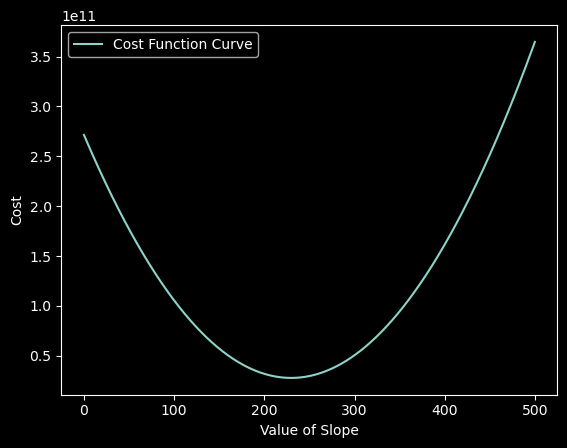

In [122]:
# plotting the cost values corresponding to every value of beta
plt.plot(Cost_table.slope, Cost_table.Cost, label= 'Cost Function Curve')
plt.xlabel('Value of Slope')
plt.ylabel('Cost')
plt.legend()

In [123]:
new_slope = Cost_table['slope'][Cost_table['Cost'] == Cost_table['Cost'].min()].values[0]
new_slope

229.7

In [124]:
def intercept_error(slope, intercept, sample_data):
    sale =[]
    for i in range(len(sample_data.flat_area)):
        tmp = sample_data.flat_area[i] * slope + intercept
        sale.append(tmp)
    MSE = mse(sample_data.sale_price, sale)
    return MSE

In [125]:
intercept = [i for i in range(5000,50000)]
Cost = []
for i in intercept:
    cost = intercept_error(slope = 229.7, intercept = i, sample_data=sample_data)
    Cost.append(cost) 

In [126]:
## arranging in dataframe
Cost_table = pd.DataFrame({'intercept':intercept, 'Cost': Cost})
Cost_table.tail()

,intercept,Cost
44995,49995,2.855987e+10
44996,49996,2.855993e+10
44997,49997,2.855999e+10
44998,49998,2.856005e+10
44999,49999,2.856011e+10


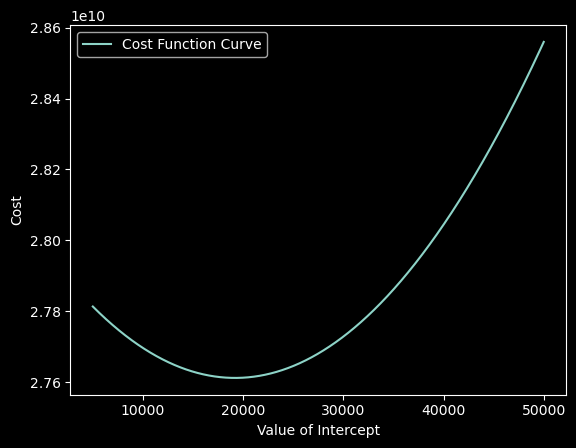

In [127]:
# plotting the cost values corresponding to every value of beta
plt.plot(Cost_table.intercept, Cost_table.Cost, label= 'Cost Function Curve')
plt.xlabel('Value of Intercept')
plt.ylabel('Cost')
plt.legend()

In [128]:
new_intercept = Cost_table['intercept'][Cost_table['Cost'] == Cost_table['Cost'].min()].values[0]
new_intercept

19199

The optimum value of slope would depend on the value of intercept and vice versa 
Now, we have to repeat the cycle a few times before the values of m and c converge to their respective optimum values that is any further repetiton of the above cycle does not result into any significant change

# Gradient Descent Algo

In [129]:
# random initialization 
def param_init(Y):
        '''Y is the target variable 
        returns initialized values of m and c'''
        m= 0.1
        c= Y.mean()
        return m , c

In [130]:
def generate_predictions(m, c, X):
    '''X= independent var
    returns prediction generated by line with parametres m and c'''
    prediction =[]
    for x in X:
        pred= (m*x)+c
        prediction.append(pred)
    return prediction

In [131]:
def compute_cost(prediction, Y):
    '''returns the mse b/w prediction and Y'''
    cost = np.sum(((prediction - Y)**2)/len(Y))
    return cost

In [132]:
def gradients(prediction, Y, X):
    '''returns gradients corresponding to m and c'''
    n = len(Y)
    Gm= 2/n* np.sum((prediction-Y)*X)
    Gc= 2/n*np.sum((prediction-Y))
    return Gm, Gc

In [133]:
def param_update(m_old, c_old, Gm_old, Gc_old, alpha):
    '''update and return the new values of m and c'''
    m_new = m_old - alpha * Gm_old
    c_new = c_old - alpha * Gc_old
    return m_new, c_new

In [134]:
def result(m, c, X, Y, cost, predictions, i):
    '''print and plot the final result obtained from gradient descent'''
    ##if the gradient descent converged to the optimum value before max_iter
    if i < max_iter-1 :
        print("**** gradient descent has converged at iteration {}****". format(i))
    else:
        print("**** Result after", max_iter, 'iteration is****')
    #plotting the final result
    plt.figure(figsize=(14, 7), dpi=120)
    plt.scatter(X, Y, color='red', label = 'data points')
    label = 'final regression line: m={}; c={}'.format(str(m), str(c))
    plt.plot(X, predictions, color='green', label=label)
    plt.xlabel('flat area')
    plt.ylabel('sale price')
    plt.title('final regression line')
    plt.legend()

After iteration 0 :m=  0.11316346413633305 ; c=  1.1849780416165836e-16 ; Cost =  0.85836535863667
After iteration 20 :m=  0.3275595607435688 ; c=  1.240489192847842e-16 ; Cost =  0.6182472245590185
After iteration 40 :m=  0.4706921039517346 ; c=  1.3248661427193537e-16 ; Cost =  0.5112264752046607
After iteration 60 :m=  0.5662485308150865 ; c=  1.415904430738617e-16 ; Cost =  0.46352728398628984
After iteration 80 :m=  0.6300427631414932 ; c=  1.4951003398285442e-16 ; Cost =  0.4422677351921283
After iteration 100 :m=  0.6726323011945988 ; c=  1.611303683072644e-16 ; Cost =  0.4327923457067555
After iteration 120 :m=  0.7010654163122192 ; c=  1.666074685620818e-16 ; Cost =  0.42856916078553225
After iteration 140 :m=  0.7200475906265729 ; c=  1.6660746856208182e-16 ; Cost =  0.4266868855601835
After iteration 160 :m=  0.7327202415200801 ; c=  1.669405354694694e-16 ; Cost =  0.42584795473189874
After iteration 180 :m=  0.7411806042798547 ; c=  1.6694053546946945e-16 ; Cost =  0.425474

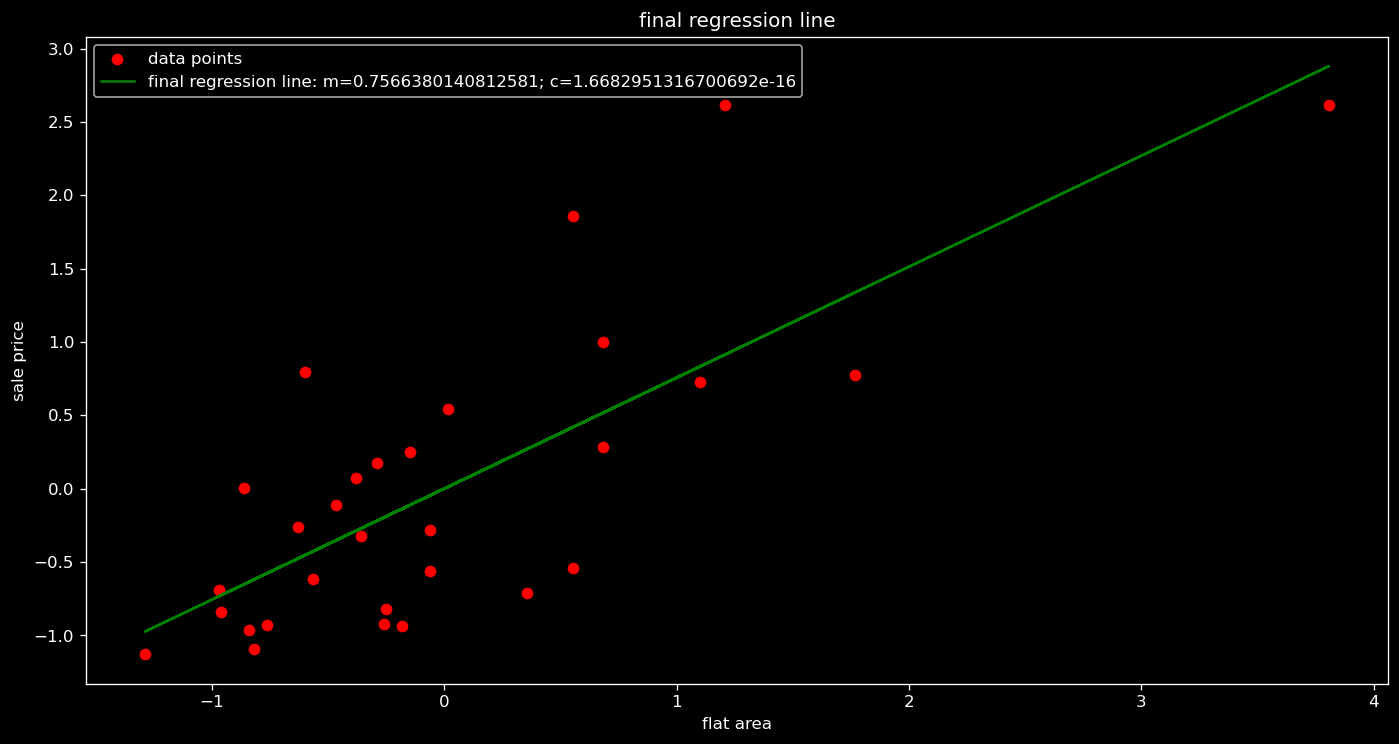

In [135]:
#defining and reshaping the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sale_price = scaler.fit_transform(sample_data['sale_price'].values.reshape(-1,1))
flat_area= scaler.fit_transform(sample_data['flat_area'].values.reshape(-1,1))

#declaring parameters
max_iter=1000
cost_old=0
alpha= 0.01

#step1: initializing the values of m and c
m, c = param_init(sale_price)

#gradient descent in action
for i in range(0, max_iter):
    #step 2: generating predictions
    predictions = generate_predictions(m, c, flat_area)
    
    #step 3: calculating cost
    cost_new = compute_cost(predictions, sale_price)
    
    # checking if GD converged
    if abs(cost_new - cost_old) < 10**(-7):
        break
        
    #calculating gradients
    Gm, Gc= gradients(predictions, sale_price, flat_area)
    
    #step 4: updating parameters m and c
    m,c = param_update(m, c, Gm, Gc, alpha)
    
    #display result after every 20 iterations
    if i%20==0:
        print("After iteration" ,i, ':m= ', m, '; c= ', c, '; Cost = ',cost_new)
    
    #updating cost_old
    cost_old = cost_new
    
#final results
result(m, c, flat_area, sale_price, cost_new, predictions, i)

In [136]:
data = pd.read_csv("Transformed_Housing_Data2.csv")
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [137]:
## scaling the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = data['Sale_Price']
X = scaler.fit_transform(data.drop(columns =['Sale_Price']))
X = pd.DataFrame(data = X, columns= data.drop(columns = ['Sale_Price']).columns)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,...,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


# Checking and Removing Multicolinearity

In [138]:
X.corr()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
No of Bedrooms,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.349223,0.477549,0.303294,-0.154113,...,-0.006578,-0.010603,-0.039342,-0.074129,0.024433,0.019420,0.090177,0.016725,0.102736,0.035694
No of Bathrooms,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,0.635638,0.685088,0.283798,-0.505954,...,0.063761,-0.032810,-0.081460,-0.034459,0.084054,0.052804,0.123256,0.037746,0.110012,0.067871
Flat Area (in Sqft),0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.705725,0.876226,0.435142,-0.318146,...,0.103841,-0.058817,-0.063005,-0.078761,0.086139,0.075978,0.160045,0.051211,0.169576,0.090253
Lot Area (in Sqft),0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,0.102314,0.183492,0.015252,-0.053119,...,0.021605,0.023684,0.052103,-0.041112,-0.012050,0.015320,-0.023270,-0.027419,-0.007025,0.002671
No of Floors,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,0.461368,0.524031,-0.245572,-0.489244,...,0.023719,-0.003385,-0.067904,0.079211,0.071786,0.009203,0.069857,0.064981,-0.008633,0.005868
No of Times Visited,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.223661,0.167812,0.276974,0.053395,...,0.401856,-0.065000,0.004754,0.005905,0.003509,0.024801,0.068144,-0.012548,0.065335,0.012923
Overall Grade,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,1.000000,0.705153,0.145232,-0.456711,...,0.070332,-0.075495,-0.121379,-0.047869,0.151245,0.095613,0.200548,0.077126,0.156952,0.048638
Area of the House from Basement (in Sqft),0.477549,0.685088,0.876226,0.183492,0.524031,0.167812,0.705153,1.000000,-0.051825,-0.423848,...,0.072099,-0.028348,-0.052418,-0.090628,0.086640,0.062267,0.129310,0.029477,0.134021,0.087398
Basement Area (in Sqft),0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.145232,-0.051825,1.000000,0.133072,...,0.080595,-0.069149,-0.032302,0.006247,0.016422,0.040662,0.090206,0.051128,0.101159,0.023775
Age of House (in Years),-0.154113,-0.505954,-0.318146,-0.053119,-0.489244,0.053395,-0.456711,-0.423848,0.133072,1.000000,...,0.026149,-0.070111,0.022094,0.095882,-0.056974,-0.009965,0.025718,0.101486,-0.002705,-0.002492


In [139]:
## pair of independent variables with correlation > 0.5
k = X.corr()

## res= [(element of final list) x (how to take different values) x (condition to store the final element)]
z = [[str(i),str(j)] for i in k.columns for j in k.columns if(k.loc[i,j] > abs(0.5)) & (i!=j)]
z, len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 

32/2 = 16 pairs are unique with corr > 0.5

# Calculating VIF

In [140]:
# importing variance_inflation_factor function from the statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = X

## calculating vif for every column
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range (vif_data.shape[1])], index=vif_data.columns)
VIF

No of Bedrooms                                  1.639470
No of Bathrooms                                 3.374992
Flat Area (in Sqft)                          1481.681648
Lot Area (in Sqft)                              2.108079
No of Floors                                    2.127787
No of Times Visited                             1.432385
Overall Grade                                   2.967448
Area of the House from Basement (in Sqft)    1205.549115
Basement Area (in Sqft)                       345.465009
Age of House (in Years)                         2.629539
Latitude                                        2.471442
Longitude                                       1.672691
Living Area after Renovation (in Sqft)          3.068139
Lot Area after Renovation (in Sqft)             2.144347
Years Since Renovation                          2.788098
Condition_of_the_House_Excellent               53.578111
Condition_of_the_House_Fair                   166.129930
Condition_of_the_House_Good    

7 variables exhibit multicollinearity, we need to remove it

In [141]:
VIF[VIF==VIF.max()].index[0]       # will return the index where the max value is stored

'Flat Area (in Sqft)'

In [142]:
def MC_remover(data):
    vif = pd.Series([variance_inflation_factor(data.values, i) for i in range (data.shape[1])], index= data.columns)
    if vif.max() > 5:
        print(vif[vif == vif.max()].index[0], 'has been removed')
        data = data.drop(columns = [vif[vif == vif.max()].index[0]])
        return data
    else:
        print("No multicollinearity present anymore")
        return data                                                   

In [143]:
for i in range(7):
    vif_data = MC_remover(vif_data)
vif_data.head()

Flat Area (in Sqft) has been removed
Condition_of_the_House_Fair has been removed
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore


,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,...,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


In [144]:
# calculating vif for remaining columns
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF, len(vif_data.columns)

(No of Bedrooms                               1.638990
 No of Bathrooms                              3.373805
 Lot Area (in Sqft)                           2.107495
 No of Floors                                 2.127703
 No of Times Visited                          1.432363
 Overall Grade                                2.956967
 Area of the House from Basement (in Sqft)    4.580042
 Basement Area (in Sqft)                      1.974981
 Age of House (in Years)                      2.626504
 Latitude                                     2.471343
 Longitude                                    1.672667
 Living Area after Renovation (in Sqft)       3.063886
 Lot Area after Renovation (in Sqft)          2.144068
 Years Since Renovation                       2.788064
 Condition_of_the_House_Excellent             1.206487
 Condition_of_the_House_Good                  1.251488
 Condition_of_the_House_Okay                  1.025386
 Ever_Renovated_Yes                           2.955539
 Waterfron

None of the remaining variables have the VIF value over 5

# Train/Test Set

In [145]:
x = vif_data                #independent var
y = data['Sale_Price']      #dependent var

In [146]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15126, 30), (6483, 30), (15126,), (6483,))

# Linear Regression

In [163]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Fit the model with the standardized data
lr.fit(x_train, y_train)

LinearRegression()

In [164]:
lr.coef_

array([ -3995.28591458,  11902.27793003, 101937.22434576,  15031.10713549,
         2739.41413335,  27228.52739147,  59655.12354705, -11021.94849251,
       -21376.61844027,  28026.87248814,  21383.31819922, -23863.46356065,
        18135.87459276,  -2950.64270197, -10199.35434129,  30813.12311568,
        29521.356377  ,  32205.65517171,   3153.31349292,  14561.0226321 ,
        10798.73914992,  12141.12475095,  33834.10169629,  63262.46919428,
        81093.98126044,  50696.91127205,  73288.36977146,  40180.96604032,
        67426.94575079,  22107.36723561])

In [165]:
predictions = lr.predict(x_test)
lr.score(x_test, y_test)          ## gives the R2 value

0.8462355542468781

1. RESIDUALS

In [166]:
residuals = predictions - y_test
residual_table = pd.DataFrame({'residuals':residuals, 'predictions':predictions})
residual_table = residual_table.sort_values(by='predictions')

In [167]:
z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

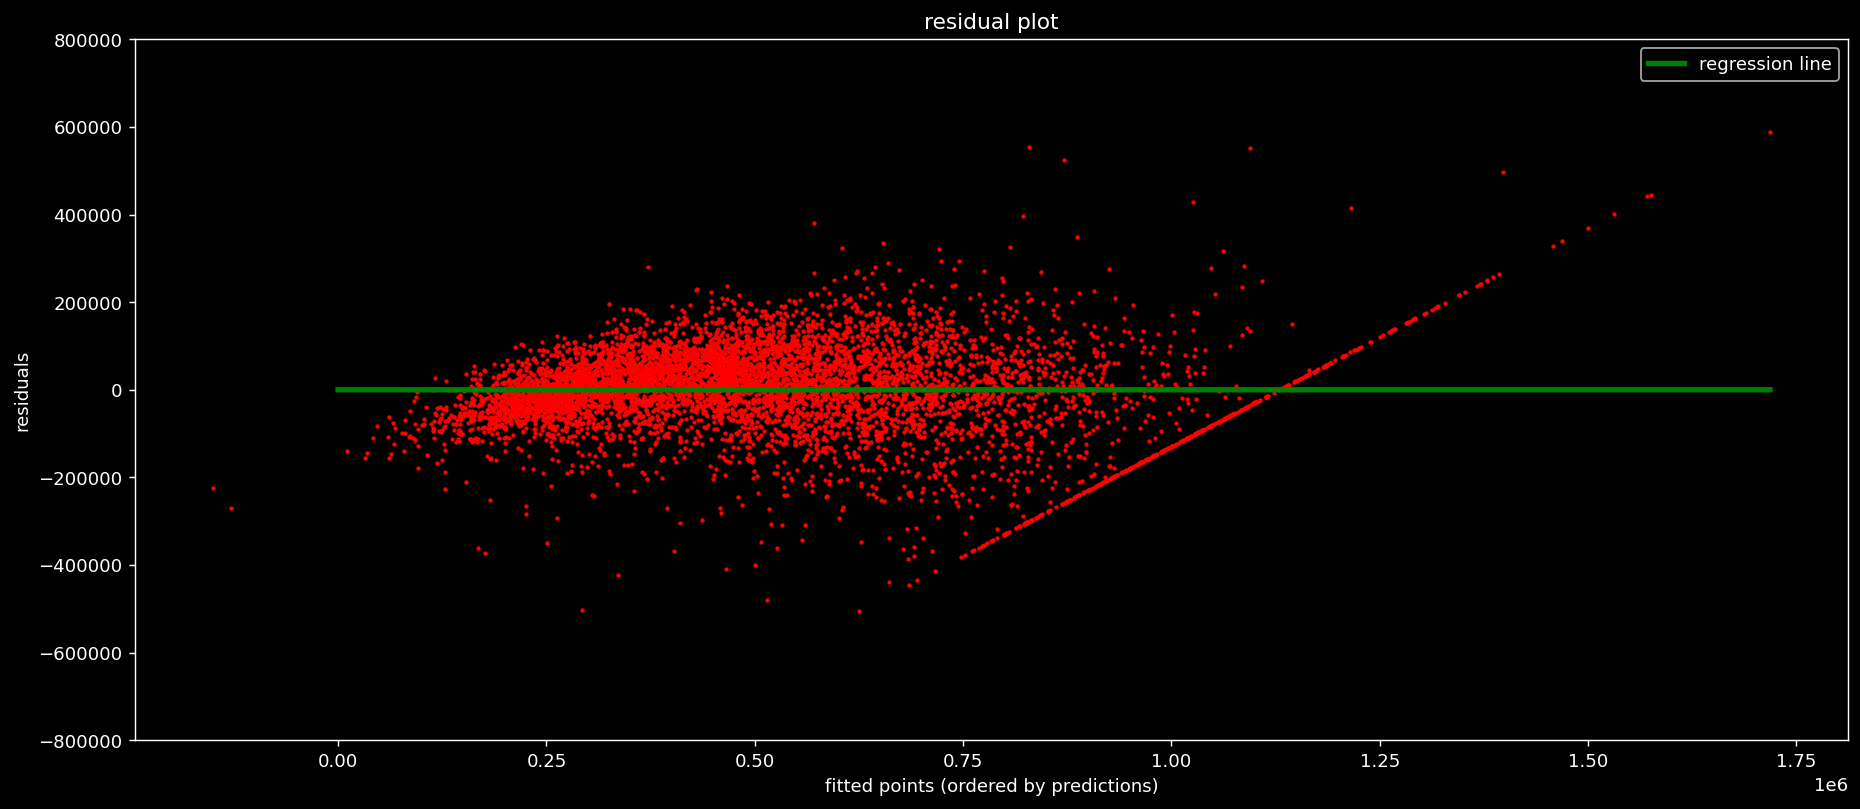

In [168]:
plt.figure(dpi = 130, figsize = (17,7))

plt.scatter( residual_table['predictions'], residual_table['residuals'], color = 'red', s = 2)
plt.plot(z, k, color = 'green', linewidth = 3, label = 'regression line')
plt.ylim(-800000, 800000)
plt.xlabel('fitted points (ordered by predictions)')
plt.ylabel('residuals')
plt.title('residual plot')
plt.legend()
plt.show()

1. The residuals are densely populated b/w the limits 200000 to -200000
2. There is a good probability that the residuals are normally distributed
3. The residual plot resembles neither the cone shape nor the pipe shape. So, as a result there is some scope of improvements in the data
4. There are also some outliers with +ve magnitude

# Distribution of Errors

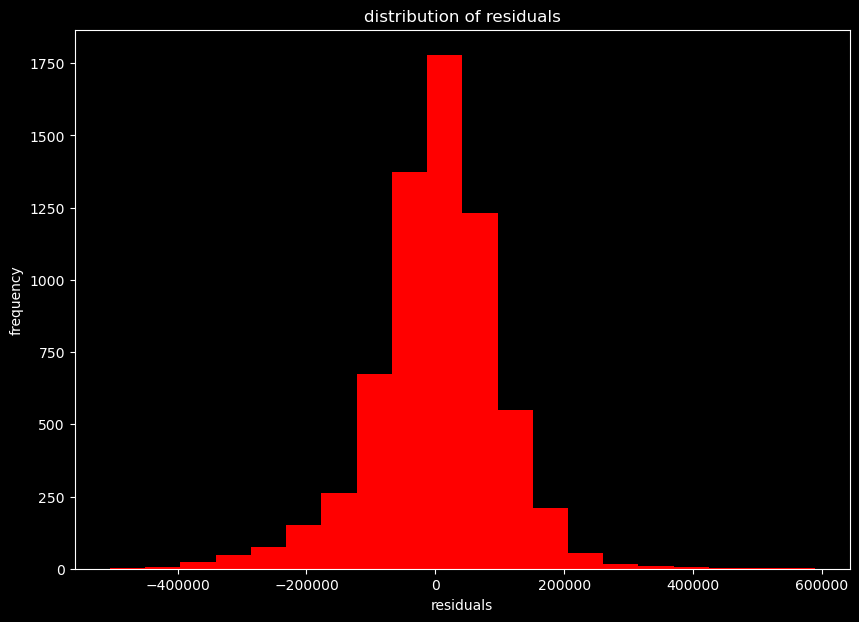

In [169]:
plt.figure(dpi = 100, figsize=(10,7))
plt.hist(residual_table['residuals'], color = 'red', bins=20)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('distribution of residuals')
plt.show()

# Model Coefficients

In [170]:
coefficients_table = pd.DataFrame({'column': x_train.columns, 'coefficients':lr.coef_})
coefficient_table = coefficients_table.sort_values(by = 'coefficients')

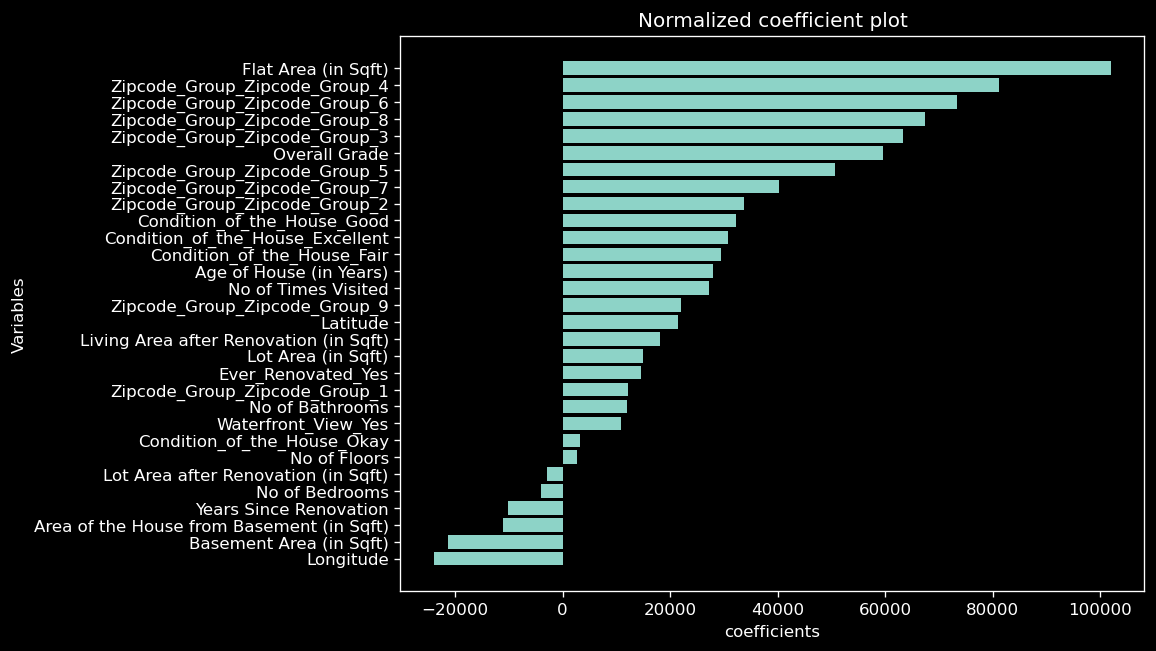

In [171]:
plt.figure(figsize=(8,6), dpi=120)
x = coefficient_table['column']
y = coefficient_table['coefficients']
plt.barh(x,y)
plt.xlabel('coefficients')
plt.ylabel('Variables')
plt.title('Normalized coefficient plot')
plt.show()

From the above graph, it's inferrred that some coefficients has a +ve impact on the model and some has -ve. 
